This is python code to calculate helicity eigen states for the process $e^{-}e^{+}\rightarrow \mu^{-} \mu^{+}$

In [ ]:
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

In [ ]:
import numpy as np 
from IPython.display import Image
from sympy import *
from IPython.display import display, Math, Latex
import itertools    
import matplotlib.pyplot as plt
from matplotlib import rc,rcParams
rc('text', usetex=True)
rc('axes', linewidth=2)
rc('font', weight='bold')
rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [10, 7]

Helicity amplitude for massless $e^{-}e^{+}\rightarrow \mu^{-} \mu^{+}$
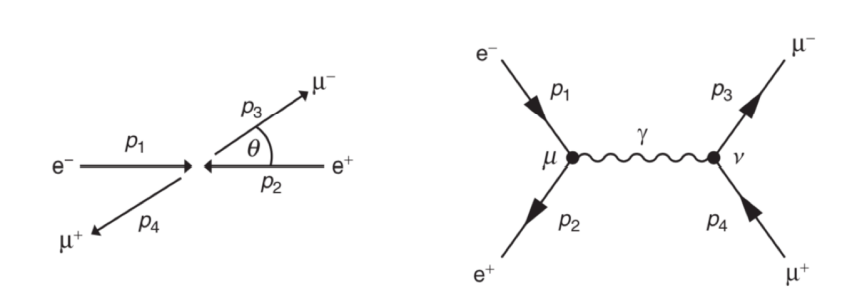

Define the symbols to be used in the equations:

In [ ]:
EE,t,g,S = symbols('E t g  S')
ga0 ,ga1,ga2,ga3=symbols(' ga0 ga1 ga2 ga3',commutative=False)

Define the four vector spinors for the incoming and outgoing leptons:

In [ ]:
def USpinorP1(h):
  if h > 0:
    return sqrt(EE)*Array([[1],[0],[1],[0]])
  if h < 0:
    return sqrt(EE)*Array([[0],[1],[0],[-1]])  
def VSpinorP2(h):
  if h > 0:
    return sqrt(EE)*Array([[1],[0],[-1],[0]])
  if h < 0:
    return sqrt(EE)*Array([[0],[-1],[0],[-1]])    
def USpinorP3(h):
  if h > 0:
    return sqrt(EE)*Array([[cos(t/2)],[sin(t/2)],[cos(t/2)],[sin(t/2)]])
  if h < 0:
    return sqrt(EE)*Array([[-sin(t/2)],[cos(t/2)],[sin(t/2)],[-cos(t/2)]])  
def VSpinorP4(h):
  if h > 0:
    return sqrt(EE)*Array([[cos(t/2)],[sin(t/2)],[-cos(t/2)],[-sin(t/2)]])
  if h < 0:
    return sqrt(EE)*Array([[sin(t/2)],[-cos(t/2)],[sin(t/2)],[-cos(t/2)]])

print out the constructed four vector spinors:

In [ ]:
r1 ="$$U(p1) = {},\ U_\downarrow(p1) = {},\ V(p2) = {},\ V_\downarrow(p2) = {}$$".format(latex(USpinorP1(1)),latex(USpinorP1(-1)),latex(VSpinorP2(1)),latex(VSpinorP2(-1)))
r2 ="$$U(p3) = {}, U_\downarrow(p3) = {}, V(p4) = {}$$".format(latex(USpinorP3(1)),latex(USpinorP3(-1)),latex(VSpinorP4(1)))
r3 ="$$V_\downarrow(p4) = {}$$".format(latex(VSpinorP4(-1)))
display(Latex(r1))
display(Latex(r2))
display(Latex(r3))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

define the Dirac gamma matrices:

In [ ]:
ga0 =  Matrix(([1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,-1]))
ga1 =  Matrix(([0,0,0,1],[0,0,1,0],[0,-1,0,0],[-1,0,0,0]))
ga2 =  Matrix(([0,0,0,-I],[0,0,I,0],[0,I,0,0],[-I,0,0,0]))
ga3 =  Matrix(([0,0,1,0],[0,0,0,-1],[-1,0,0,0],[0,1,0,0]))
gaM = [ga0,ga1,ga2,ga3]

In [ ]:
for i in range(0,4):
  r = "$$\gamma^{}={} $$".format(latex(i),latex(gaM[i]))
  display(Latex(r))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

**Scalar and vector product in Minkowski space**

In [ ]:
def dotS(v1,v2):
  return tensorproduct(v1[0],v2[0])+tensorproduct(v1[1],v2[1])+tensorproduct(v1[2],v2[2])+tensorproduct(v1[3],v2[3]) 
   

In [ ]:
def dotV(v2,v1):
  x0=tensorproduct(v1.row(0)[0],v2[0])+tensorproduct(v1.row(0)[1],v2[1])+tensorproduct(v1.row(0)[2],v2[2])+tensorproduct(v1.row(0)[3],v2[3])  
  x1=tensorproduct(v1.row(1)[0],v2[0])+tensorproduct(v1.row(1)[1],v2[1])+tensorproduct(v1.row(1)[2],v2[2])+tensorproduct(v1.row(1)[3],v2[3])
  x2=tensorproduct(v1.row(2)[0],v2[0])+tensorproduct(v1.row(2)[1],v2[1])+tensorproduct(v1.row(2)[2],v2[2])+tensorproduct(v1.row(2)[3],v2[3])
  x3=tensorproduct(v1.row(3)[0],v2[0])+tensorproduct(v1.row(3)[1],v2[1])+tensorproduct(v1.row(3)[2],v2[2])+tensorproduct(v1.row(3)[3],v2[3])
  return Array([x0,x1,x2,x3])  

In [ ]:
def Jv2u1(h1,h2):
  j0=flatten(dotS(dotV(VSpinorP2(h2),ga0*gaM[0]),USpinorP1(h1)))
  j1=flatten(dotS(dotV(VSpinorP2(h2),ga0*gaM[1]),USpinorP1(h1)))
  j2=flatten(dotS(dotV(VSpinorP2(h2),ga0*gaM[2]),USpinorP1(h1)))
  j3=flatten(dotS(dotV(VSpinorP2(h2),ga0*gaM[3]),USpinorP1(h1)))
  return Array([j0,j1,j2,j3]) 
def Ju3v4(h1,h2):
  j0=flatten(dotS(dotV(USpinorP3(h2),ga0*gaM[0]),VSpinorP4(h1)))
  j1=flatten(dotS(dotV(USpinorP3(h2),ga0*gaM[1]),VSpinorP4(h1)))
  j2=flatten(dotS(dotV(USpinorP3(h2),ga0*gaM[2]),VSpinorP4(h1)))
  j3=flatten(dotS(dotV(USpinorP3(h2),ga0*gaM[3]),VSpinorP4(h1)))
  return Array([j0,j1,j2,j3]) 

print vector current for the incoming & outgoing particles

In [ ]:
for i,j in itertools.product([-1,1],repeat=2):
  r ="$$Jv2u1[{},{}] = {},\ \  Ju3v4[{},{}] = {}$$".format(latex(i),latex(j),latex(Jv2u1(i,j).simplify()),latex(i),latex(j),latex(Ju3v4(i,j).simplify()))   
  display(Latex(r))    

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Altogether to calculate $M = \frac{-e^2} {S}$. jv2u1.ju3v4 16 helicity states with vanishing Longitudinal
helicity

In [ ]:
def M(h1,h2,h3,h4):
  return flatten(dotS(Jv2u1(h1,h2),Ju3v4(h3,h4))*-g**2/S)

In [ ]:
for i,j,k,l in itertools.product([-1,1],repeat=4):
  r ="$$M[{},{},{},{}] = {}$$".format(latex(i),latex(j),latex(k),latex(l),latex(M(i,j,k,l)[0].simplify()))    
  display(Latex(r))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

from the 16 helicity eigen states we have only 4 non vanishing states. Squaring the non vanishing
matrix element.

In [ ]:
a = symbols("alpha")
ampLRLR=M(-1,1,-1,1)[0].simplify().replace(sin(t/2)**2,(1-cos(t))/2).replace(S,4*EE**2).replace(g**2,4*a*pi).simplify()**2
ampLRRL=M(-1,1,1,-1)[0].simplify().replace(cos(t/2)**2,(1+cos(t))/2).replace(S,4*EE**2).replace(g**2,4*a*pi).simplify()**2  

In [ ]:
display(ampLRLR)
display(ampLRRL)

16*pi**2*alpha**2*(1 - cos(t))**2

16*pi**2*alpha**2*(cos(t) + 1)**2

*Plot the helicity eigenstates*

In [ ]:
th=symbols("t")
x=[]
yLRLR=[]
yLRRL=[]
yt=[]
p1=ampLRLR.replace(cos(t),th).subs({a:1/137,pi:3.14})
p2=ampLRRL.replace(cos(t),th).subs({a:1/137,pi:3.14})
for i in np.linspace(-1,1,50):
  x.append(i)
  yLRLR.append(0.00840500825829826*(1-i)**2) #this is the value of p1
  yLRRL.append(0.00840500825829826*(1+i)**2) #this is the value of p2
  yt.append(0.0168100165165965*i**2+0.0168100165165965)

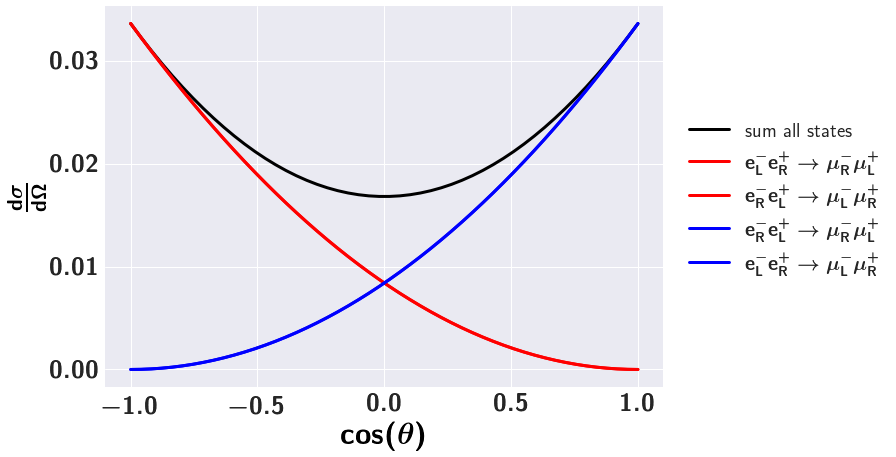

In [ ]:
plt.plot(x, yt,color='k',linewidth=3,label=r'sum all states');
plt.plot(x, yLRLR,color='r',linewidth=3,label=r'$e^-_{L} e^+_{R}\to\mu^-_{R}\mu^+_{L}$');
plt.plot(x, yLRLR,color='r',linewidth=3,label=r'$e^-_{R} e^+_{L}\to\mu^-_{L}\mu^+_{R}$');
plt.plot(x, yLRRL,color='b',linewidth=3,label=r'$e^-_{R} e^+_{L}\to\mu^-_{R}\mu^+_{L}$');
plt.plot(x, yLRRL,color='b',linewidth=3,label=r'$e^-_{L} e^+_{R}\to\mu^-_{L}\mu^+_{R}$');
plt.xlabel(r'\textbf{$\cos(\theta)$}', fontsize=30 , color='black');
plt.ylabel(r'$\frac{d\sigma}{d\Omega}$', fontsize=30 , color='black');
plt.tick_params(axis='x', labelsize=25);
plt.tick_params(axis='y', labelsize=25);
plt.legend(loc='best', fancybox=True, framealpha=1, shadow=True, borderpad=0.5,fontsize = 20, bbox_to_anchor=(1.01, .75));
